In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
df = pd.read_csv('iris.csv')
df.head(-1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


In [70]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [71]:
df.duplicated().sum()

0

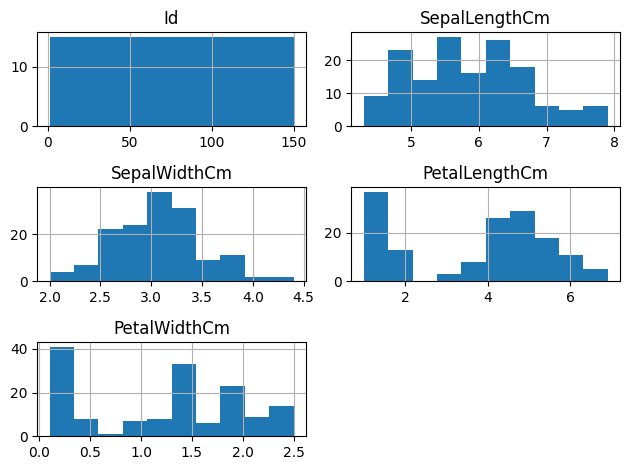

In [72]:
df.hist()
plt.tight_layout()

In [73]:
# Dependent variable - Iris-setosa
# Independent variables - Iris-versicolor, Iris-virginica
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
#Encoding y, Iris-setosa = 0, others as 1 (Label encoding)
label_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 1
}

le = LabelEncoder()

df['Species'] = df['Species'].map(label_mapping)
df.head(-1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,1
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1


<Axes: >

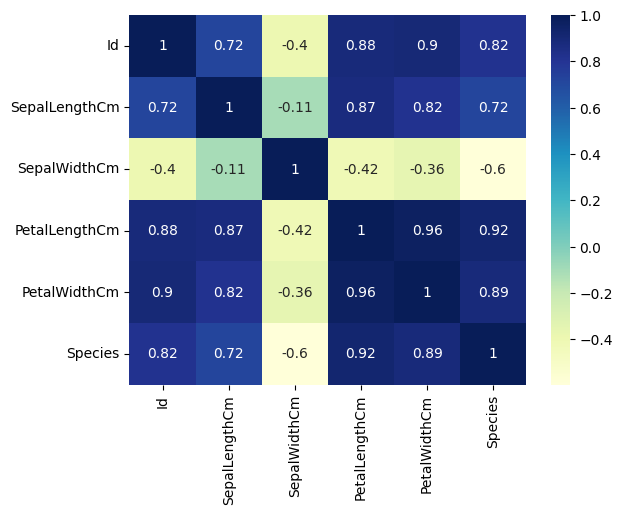

In [75]:
df['Species'].unique()

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [76]:
#Split to training and test
X = df.drop(['Species'], axis=1)
y = df['Species']

print("Original df: ", df.shape)
print("X df: ", X.shape)
print("y df: ", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)



Original df:  (150, 6)
X df:  (150, 5)
y df:  (150,)


In [77]:
# User sklearns  logistin regression function to fit a model and make predictions on the test set
# Initialise
log_reg = LogisticRegression()

#Fit to model on trained data
log_reg.fit(X_train, y_train)



LogisticRegression()

In [78]:
#Predict
y_pred = log_reg.predict(X_test)
y_pred


array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [79]:
# Use sklearn to generate a confusion matrix, which compares the predicted labels to the actual labels (gold labels)
print("Accuracy: \n", accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("Classification report: \n ", classification_report(y_pred, y_test))

Accuracy: 
 1.0
Confusion Matrix: 
 [[43  0]
 [ 0 77]]
Classification report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        77

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
# Analyse the confusion matrix and provide a prediction, in a comment, on whether the model is likely to to have higher precision,
# higher recall or similar precision and recall

# - Based on the matrix we can see a 100% success rate accross all areas

In [149]:

# Write your own code to calulate teh accuracy, precision and recall - check whether your prediction was right

def accuracy(y_pred, y_test):
    tp= tn= fp= fn = 0
    y_test = y_test.values.reshape(-1,1)
    for i in range(y_pred.size):
        if y_pred[i] == 0 and y_test[i] == 0:
            tp+=1
        elif (y_pred[i] == y_test[i] == 1):
            tn+=1
        elif (y_pred[i] == 0 & y_test[i] == 1):
            fp+=1
        elif (y_pred[i] == 1 & y_test[i] == 0):
            fn+=1
    calc = (tp + tn) / (tp + fn + tn+ fp)
    return calc

def precision(y_pred, y_test):
    tp = fp = 0
    y_test = y_test.values.reshape(-1,1)

    for i in range(y_pred.size):
        if y_pred[i] == 0 and y_test[i] == 0:
            tp+=1
        elif (y_pred[i] == 0 & y_test[i] == 1):
            fp+=1
    calc = (tp) / (tp + fp)
    return calc

def recall(y_pred, y_test):
    tp = fn = 0
    y_test = y_test.values.reshape(-1,1)

    for i in range(y_pred.size):
        if y_pred[i] == 0 and y_test[i] == 0:
            tp+=1
        elif (y_pred[i] == 1 & y_test[i] == 0):
            fn+=1
    calc = (tp) / (tp + fn)
    return calc

print("My accuracy: ", accuracy(y_pred, y_test))
print("My precision: ", precision(y_pred, y_test))
print("My recall: ", recall(y_pred, y_test))

My accuracy:  1.0
My precision:  1.0
My recall:  1.0
